<a href="https://colab.research.google.com/github/KhalidAbdelaty/Gold-Price-Prediction/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing The Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

**Data Collection and Processing**

In [2]:
# Load the gold price data from a CSV file into a pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [3]:
# Display the first 5 rows of the gold_data DataFrame
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# Display the last 5 rows of the gold_data DataFrame
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# the number of rows and columns
gold_data.shape

(2290, 6)

In [6]:
# Display the summary information
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# the number of missing values in each column
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# Generate descriptive statistics
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


**Correlation:**

**1.Positive Correlation**

**2.Negative Correlation**

In [10]:
# Compute the pairwise correlation of these columns
correlation = gold_data.corr()

<ipython-input-10-0d412fafdf21>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

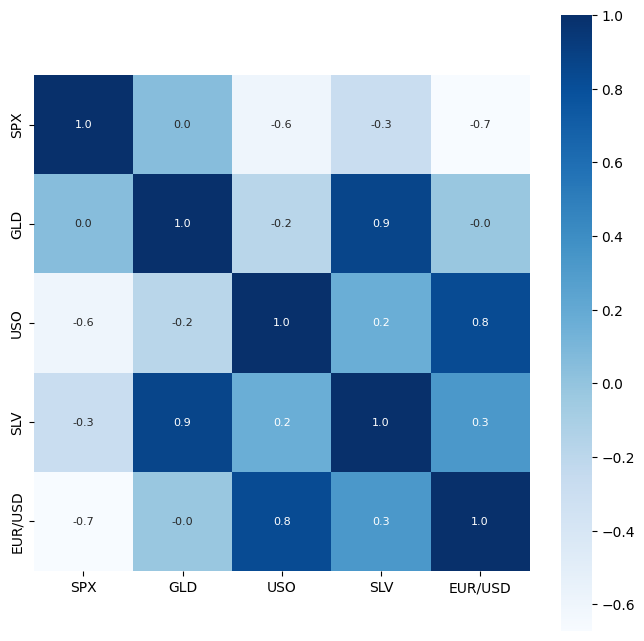

In [11]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square = True, fmt='.1f', annot = True, annot_kws = {'size': 8 }, cmap = 'Blues')

In [12]:
# Print the correlation values between 'GLD' and other columns
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: xlabel='GLD', ylabel='Density'>

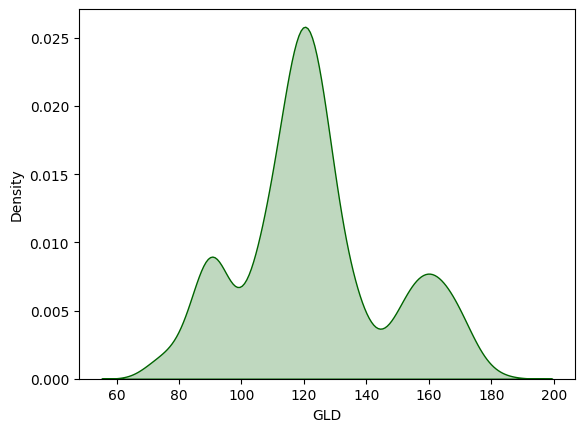

In [14]:
# Checking the distribution of the 'GLD' Price
sns.kdeplot(gold_data['GLD'], color='darkgreen', fill=True)

**Splitting The Features and Target**

In [15]:
X = gold_data.drop(['Date','GLD'], axis=1)
Y = gold_data['GLD']

In [16]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [17]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


**Splitting Into Training Data and Test Data**

In [18]:
X_trian, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

**Model Training : Random Forest Regressor**

In [19]:
# Initialize a RandomForestRegressor model with 100 decision trees
regressor = RandomForestRegressor(n_estimators=100)

In [20]:
# Train the RandomForestRegressor model on the training data
regressor.fit(X_trian, Y_train)

RandomForestRegressor()

**Model Evaluation**

In [22]:
# Prediction On Test Data
test_data_prediction = regressor.predict(X_test)

In [23]:
print(test_data_prediction)

[168.45569909  82.10180013 116.12190046 127.76380086 120.60630132
 154.54649806 150.28009848 125.97160071 117.44509869 126.15670074
 116.34320084 171.82720107 141.35909856 167.83019878 115.3927001
 117.84170043 139.98450319 170.24380144 159.26510237 158.90469914
 155.13119973 125.33120023 175.59739953 157.13630343 125.20580051
  93.73689967  77.52930003 120.12289985 119.07869918 167.61820001
  88.19030043 125.28770045  90.79420016 117.64750046 121.1169995
 135.72859989 115.77660108 114.95730085 147.0618002  107.52020128
 104.30320245  87.06079772 126.5093007  118.15090041 153.85469909
 119.63470003 108.37570004 108.23479813  93.06020062 127.06999817
  75.46279999 113.71359918 121.37660015 111.32169923 118.89689882
 120.80209925 158.55300011 167.95100125 146.97459731  85.91699855
  94.26950039  86.60419888  90.6221002  118.93670102 126.4286005
 127.5182     169.88940029 122.24839944 117.30599914  98.49969995
 168.91650162 143.14349829 132.07680237 121.22800184 120.90129922
 119.56210072

In [24]:
# R Squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R Squared Error : " , error_score)

R Squared Error :  0.9890468369260285


**Compare The Actual Values and Predicted Values in a Plot**

In [25]:
Y_test = list(Y_test)

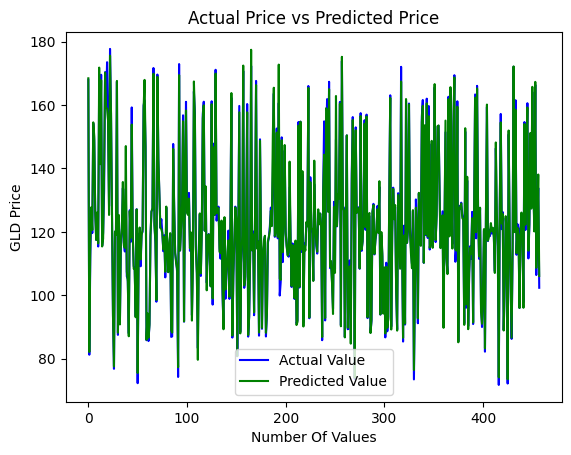

In [26]:
# Plot the actual values in the test set in blue
plt.plot(Y_test, color='blue', label= 'Actual Value')

# Plot the predicted values in green
plt.plot(test_data_prediction, color='green', label= 'Predicted Value')

# Set the title of the plot
plt.title('Actual Price vs Predicted Price')

# Label the x-axis as 'Number Of Values'
plt.xlabel('Number Of Values')

# Label the y-axis as 'GLD Price'
plt.ylabel('GLD Price')

# Display the legend
plt.legend()

# Display the plot
plt.show()
